## Cleaning and Simple EDA on Titanic Data
In this Notebook, we will be exploring a slightly modified version of the [`titanic` dataset](https://www.kaggle.com/c/titanic/data). Note that for this activity, you should get the dataset from AnimoSpace since it is a slightly modified version of the one in the link above. In the process of exploring this data, we will be covering techniques on exploratory data analysis.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email me at arren.antioquia@dlsu.edu.ph

## Import
Import **pandas** and **matplotlib**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset
For this notebook, we will working on a dataset called `titanic` dataset. This dataset contains passenger information from a subset of passengers of Titanic.

The dataset is provided to you as a `.csv` file. `.csv` means comma-separated values. You can open the file in Notepad to see how it is exactly formatted.

If you view the `.csv` file in Excel, you can see that our dataset contains many **observations** (rows) across 12 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`Passenger`**: Passenger number.
- **`Survived`**: Indicates if the passenger has survived (1) or not (0).
- **`Pclass`**: Ticket class. 1 = Upper; 2 = Middle; 3 = Lower.
- **`Name`**: Name of the passenger.
- **`Sex`**: Sex.
- **`Age`**: Age.
- **`SibSp`**: Number of siblings / spouses aboard the Titanic.
- **`Parch`**: Number of parents / children aboard the Titanic.
- **`Ticket`**: Ticket Number.
- **`Fare`**: Passenger fare.
- **`Cabin`**: Cabin number.
- **`Embarked`**: Point of embarkation. C = Cherbourg; Q = Queenstown; S = Southampton.

## Reading the Dataset
Our first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. To load the dataset, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Note that you may need to change the path depending on the location of the file in your machine.

In [3]:
titanic_df = pd.read_csv("datasets/titanic.csv")

Whenever we load a new dataset, it is generally a good idea to call the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning the Dataset
The next step in Exploratory Data Analysis is cleaning the data.

Let's first check if the values in relevant variables in the dataset are within the range of acceptable values. 

### `Survived` variable
Check if the values for the `Survived` varible is either 1 or 0. Use the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to list all unique values for this variable.

In [4]:
titanic_df['Survived'].unique()

array([0, 1])

### `Pclass` variable
**Practice!** Valid values for the `Pclass` variable are 1, 2, or 3. List all unique values for the `Pclass` variable.

In [5]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Pclass'].unique()

array([3, 1, 2])

**Question:** Do we need to perform data cleaning for the `Pclass` variable? Explain.
- There's no need to clean the Pclass variable as the unique values fall within the specified classification range of 1 to 3. 

### `Sex` variable
List all unique values for the `Sex` variable.

In [6]:
titanic_df['Sex'].unique()

array(['male', 'female', 'm', 'M', 'F', 'f', 'Female', 'Male'],
      dtype=object)

Since we discover that there are multiple representations of the same sex (`Male`, `M`, `m`, `male` for male; `Female`, `F`, `f`, `female` for female), let's modify these values to combine different representations. It would be best to check the most prevalent representation for each sex. To find out the number of observations per value, we use the [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function. This function returns the count of each unique value in the Series.

In [7]:
titanic_df['Sex'].value_counts()

male      551
female    300
m          12
M          10
F           7
Male        4
f           4
Female      3
Name: Sex, dtype: int64

We discover that most observations in the dataset use the `male` and `female` representations. We'll use the [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function to change the values of the other representations. 

In [8]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 'male', 'm': 'male', 'M': 'male', 'Male': 'male', 
                                           'female': 'female', 'f': 'female', 'F': 'female', 'Female': 'female'})

Upon mapping all equivalent values to `male` and `female`, let's check the unique values for the `Sex` variable.

In [9]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

### `Embarked` variable
**Practice!** List all unique values for the `Embarked` variable.

In [10]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Embarked'].unique()

array(['S', 'c', 'q', 'C', 'Q', nan, 's'], dtype=object)

**Practice!** Determine if the variable contains multiple representation pertaining to the same value. If needed, map the other values to their corresponding prevalent representation.

In [11]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Embarked'] = titanic_df['Embarked'].map({'c':'C', 'q':'Q', 's':'S'})

After performing some operations (if needed), let's check the unique values for the `Embarked` variable again.

In [12]:
titanic_df['Embarked'].unique()

array([nan, 'C', 'Q', 'S'], dtype=object)

### Checking for `NaN`s
We will now handle missing data in our dataset. Let us check each variable if it contains a `NaN` / `null` value. We'll use the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`any`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) functions for this. This function call will list each variable with a boolean value indicating if the variable contains a `NaN` / `null` value.

In [13]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Let's get the list of columns with `NaN` / `null` values.

In [14]:
nan_variables = titanic_df.columns[titanic_df.isnull().any()].tolist()
print(nan_variables)

['Age', 'Cabin', 'Embarked']


For each variable, show the total number of observation with `NaN` / `null` value.

In [15]:
for variable in nan_variables:
    print(variable, sum(titanic_df[variable].isnull()))

Age 177
Cabin 687
Embarked 837


**Practice!** Since we see that there is a very small number of observation with `NaN` / `null` value for the `Embarked` variable, we can decide to drop those observations from the dataset. 

**Hint!** Use the [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function.

In [16]:
# Write your code here. You may add extra cells if necessary.
titanic_df = titanic_df.dropna(subset= ['Embarked'])

**Practice!** Check if the observations with `NaN` / `null` values for the `Embarked` variable have been dropped from the dataset. Make sure that the `NaN` value is not included in the list of all values for the `Embarked` variable.

In [17]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Embarked'].unique()

array(['C', 'Q', 'S'], dtype=object)

**Sanity Check!** Your code should display:

```array(['S', 'C', 'Q'], dtype=object)```

There is a significant number of observation with `NaN` / `null` value for the `Age` variable. Instead of removing these observations from the dataset, we can just set a default value to identify these observations. Since age cannot be a negative number, let's represent observations with no value for the `Age` variable as -1. Use the [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function to select and assign -1 as value for the `Age` variable of these observations

In [18]:
titanic_df.loc[titanic_df['Age'].isnull(),'Age'] = -1

**Practice!** Write a line of code to display the boolean `False` indicating that there is no null value for the `Age` variable.

In [19]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Age'].isnull().values.any()

False

**Practice!** There is a significant number of observation with `NaN` / `null` value for the `Cabin` variable. Instead of removing these observations from the dataset, we can just set a default value to identify these observations. Set the value of those observations with `NaN` / `null` as value for the `Cabin` variable to the value 0.

In [20]:
# Write your code here. You may add extra cells if necessary.
titanic_df.loc[titanic_df['Cabin'].isnull(),'Cabin'] = 0

**Practice!** Write a line of code to display the boolean `False` indicating that there is no null value for the `Cabin` variable.

In [21]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Cabin'].isnull().values.any()

False

## Visualizations
You will need to visualize the next parts. Here are some sample codes to help you display 3 simple charts: bar plot, histograms, and scatter plots.

### Bar plot
Bar plots are used to show the count of each value. They are only used for categorical data. Use the [`bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) function.

Let's create a plot showing the survival status of Titanic passengers.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

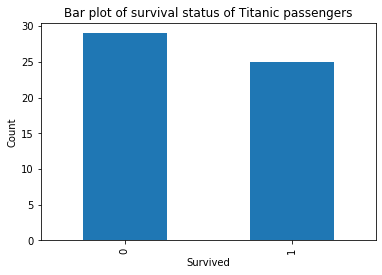

In [22]:
survived_count_df = titanic_df['Survived'].value_counts()

survived_count_df.plot.bar()
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

Let's create a plot showing the survival status of Titanic passengers with respect to the sex.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

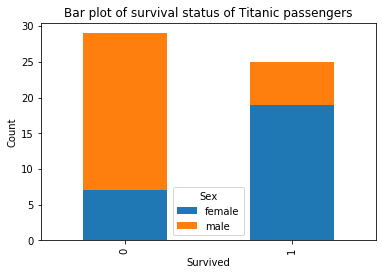

In [23]:
titanic_df.groupby(['Survived', 'Sex']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

### Histogram
If the data is continuous, histograms are used. 

With bar plots, it might be impossible to write down all the numbers that appeared. Furthermore, the x-axis will not represent the scale correctly. Use the [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function

Let's create a histogram of the age of Titanic passengers.

Text(0.5, 1.0, 'Histogram of the age of Titanic passengers')

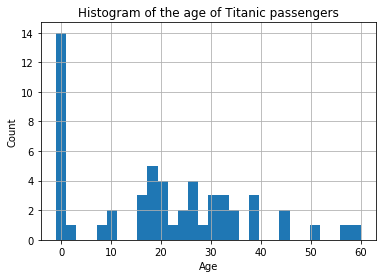

In [24]:
titanic_df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the age of Titanic passengers')

Based on the plot, we see that our histogram shows that most observations are `NaN` (represented as -1). Let us temporarily remove these observations and create the histogram again.

Text(0.5, 1.0, 'Histogram of the age of Titanic passengers')

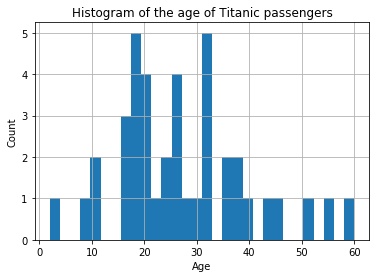

In [25]:
titanic_copy_df = titanic_df[titanic_df['Age'] != -1]
titanic_copy_df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the age of Titanic passengers')

### Scatter plot

We can use scatter plot to compare two quantitative attributes. Use the [`plot`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html) function of `matplotlib`.

Let's create a scatterlot of the fare and age of Titanic passengers.

Text(0.5, 1.0, 'Scatterplot of the fare and age of Titanic passengers')

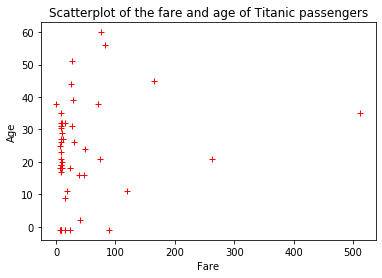

In [26]:
plt.plot(titanic_df['Fare'], titanic_df['Age'], 'r+')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatterplot of the fare and age of Titanic passengers')

## Exploratory Data Analysis

**Practice!** Visualize the relationship between the `Survived` variable and the `Age` variable. Use the appropriate plot to show the relationship.

Text(0.5, 1.0, 'Histogram of the survival status of Titanic passengers according to age')

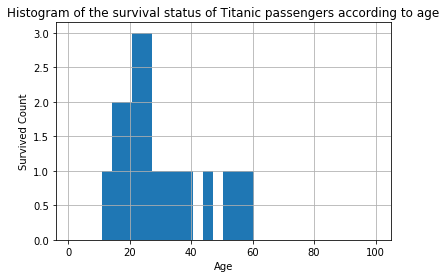

In [41]:
# Write your code here. You may add extra cells if necessary.
# Filter data first - get who lived and has a valid age
tc = titanic_df[(titanic_df['Age'] > -1)&(titanic_df['Survived'] == 1)]
tc['Age'].hist(bins=30, range=(1,100))
plt.xlabel('Age')
plt.ylabel('Survived Count')
plt.title('Histogram of the survival status of Titanic passengers according to age')

**Question:** Describe the data based on the plot. 
- The latter end of the bar graph shows that many seniors survived likely because they got into the escape boats first due to their vulnerability. Many passengers in their mid-20s survived too as they had stronger bodies that can resist the freezing water for a longer while compared to the young people and adults (over 30).

**Practice!** Visualize the relationship between the `Survived` variable and the `Pclass` variable. Use the appropriate plot to show the relationship.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers according to class')

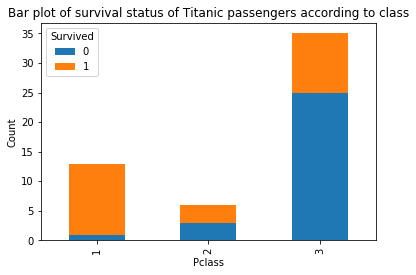

In [42]:
# Write your code here. You may add extra cells if necessary.
titanic_df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers according to class')

**Question:** Describe the data based on the plot. 
- VIP Passengers were prioritized and escorted to safety, while the lower class were left on the boat.

From this point on, define your own question about the dataset and try to answer it with the concepts you have learned in this Notebook. Use plots to show the relationship between variables. Describe the data based on the plot. Please make sure that you keep the Notebooks readable - use markdown cells wherever necessary to clearly articulate what you are trying to do with each code.

Text(0.5, 1.0, 'Bar plot of survival status of single Titanic passengers')

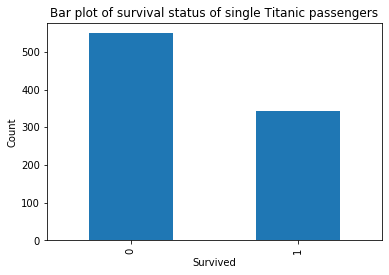

In [21]:
tc = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)]
tc_copy = titanic_df['Survived'].value_counts()
tc_copy.plot.bar()
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of single Titanic passengers')

The bar graph shows that very few single passengers survived; these were most likely sea men who were working for the cruise ship.